In [1]:
!python --version


Python 3.9.21


In [2]:
#%matplotlib widget
import sys
sys.path.insert(0, '/u/ageorge/athena_fork_turb_box/athena_new_version/athena/vis/python')
import athena_read
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import scipy.stats as stats
import pandas as pd
plt.rcParams['animation.ffmpeg_path'] = '/mpcdf/soft/SLE_15/packages/x86_64/ffmpeg/4.4.0/bin/ffmpeg'

#import cmasher as cmr

# Access rainforest colormap through CMasher or MPL
#cmap = cmr.rainforest                   # CMasher


## Plotting current v_turb vs time

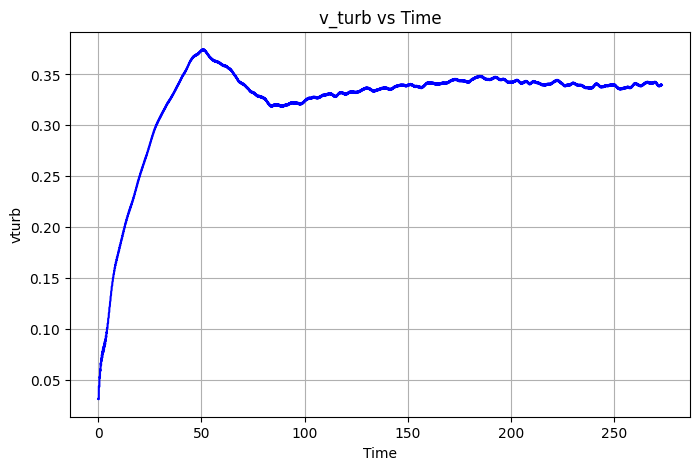

In [3]:
data = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst", comments="#")
time = data[:, 0]
mass = data[:, 2]

KE = data[:, 6] + data[:, 7] + data[:, 8]
vturb = np.sqrt(2 * KE / mass)


plt.figure(figsize=(8, 5))
plt.plot(time, vturb, color="blue")
plt.xlabel("Time")
plt.ylabel("vturb")
plt.title("v_turb vs Time")

plt.grid()
plt.savefig("vturb vs Time.png")
plt.show()



In [50]:
new_vturb = vturb[-500:].mean()
actual_M = new_vturb/cs
actual_M

np.float64(0.3614908565823911)

## Plotting Mach number vs time

In [ ]:
file_names = sorted(glob.glob("Turb_v2_init/Test_6/1/*.athdf"))
gamma = 1.666666666667
vturbs = []
cs = []


for file in tqdm(file_names):
    if "out2" in file:
        data = athena_read.athdf(file)
        pressure = np.mean(data["press"])
        rho = np.mean(data["rho"])
        cs.append(np.sqrt(gamma * pressure / rho))

        velx = data['vel1']
        vely = data['vel2']
        velz = data['vel3']
        velx_mean = np.mean(velx)
        vely_mean = np.mean(vely)
        velz_mean = np.mean(velz)

        velx_prime = velx - velx_mean
        vely_prime = vely - vely_mean
        velz_prime = velz - velz_mean

        vturb = np.sqrt(np.mean(velx_prime**2 + vely_prime**2 + velz_prime**2 ))
        vturbs.append(vturb)
    else:
        pass
    



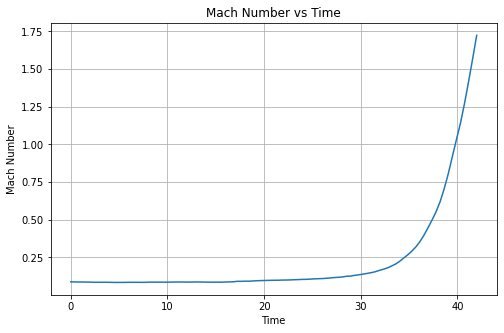

In [11]:
vturbs = np.array(vturbs)
cs = np.array(cs)

Mach_number = vturbs/cs
times = np.linspace(0, 42, 101)

plt.figure(figsize=(8, 5))
plt.plot(times, Mach_number)
plt.xlabel("Time")
plt.ylabel("Mach Number")
plt.title("Mach Number vs Time")

plt.grid()
plt.savefig("Mach number vs Time.png")
plt.show()


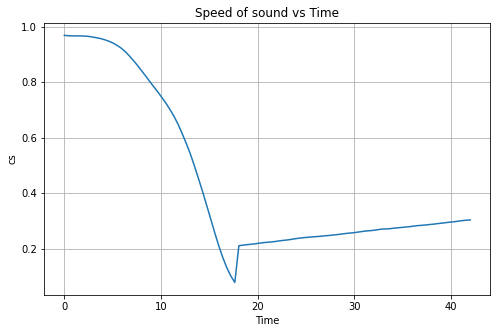

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(times, cs)
plt.xlabel("Time")
plt.ylabel("cs")
plt.title("Speed of sound vs Time")

plt.grid()
plt.savefig("cs vs Time.png")
plt.show()


## Plotting Temperature vs time

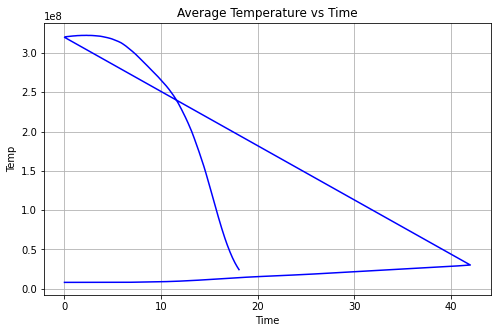

In [8]:
data = np.loadtxt("Turb_v2_init/Test_4/Turb.hst", comments="#")
time = data[:, 0]
temp = data[:,16]/64**3

plt.figure(figsize=(8, 5))
plt.plot(time, temp, color="blue")
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title("Average Temperature vs Time")

plt.grid()
plt.savefig("Temp vs Time.png")
plt.show()
plt.close()


AttributeError: module 'matplotlib.pyplot' has no attribute 'ysca'

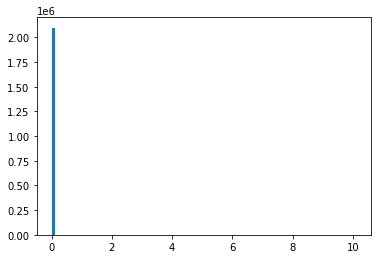

In [61]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00000.athdf')
#data['rho'].shape
#plt.imshow(data['press'][:,:,0])
plt.hist(data['rho'].flatten(), bins = 100)
plt.ysca
plt.show()


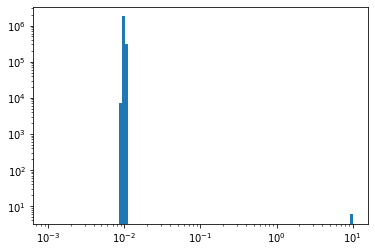

In [66]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00000.athdf')
#data['rho'].shape
press = data['rho']
#plt.imshow(data['press'][:,:,0])
plt.hist(press.flatten(), bins = np.logspace(-3,1, 100))
plt.xscale('log')
plt.yscale('log')
plt.show()

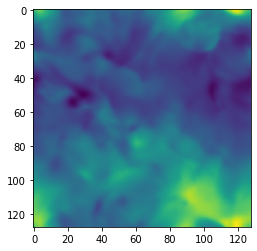

In [10]:
file_names = sorted(glob.glob("Turb_v2_init/Test_4_lowerturb/*.athdf"))

fig, ax = plt.subplots()
images = []


for file in tqdm(file_names[:]):
    if "out2" in file:
        rho = athena_read.athdf(file)["press"]
        image = ax.imshow(rho[:,:,64], cmap="viridis", animated=True)
        images.append([image])
    else:
        pass

ani = animation.ArtistAnimation(fig = fig, artists = images, interval = 150, blit = True )

ani.save('Test_4_lowerturb_press.mp4')

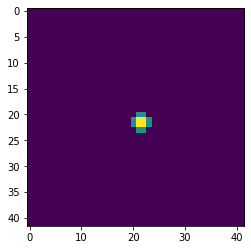

In [74]:
rho = athena_read.athdf("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00000.athdf")["rho"]
plt.imshow(np.sum(rho[42:84,42:84,:], axis = 2), cmap="viridis", animated=True)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [04:58<00:00,  3.44s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

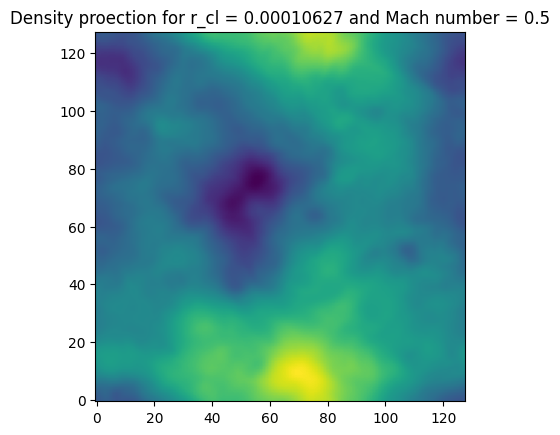

In [20]:
file_names = sorted(glob.glob("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/*.athdf"))
file_names = [i for i in file_names if "out2" in i]
fig, ax = plt.subplots()
images = []
i = 0
for file in tqdm(file_names):
    if "out2" in file:
        rho = athena_read.athdf(file)["rho"]
        rho_proj = np.exp(np.mean(np.log(rho + 1e-6), axis=2))
        #rho_proj = np.sum(rho, axis=2)
        
        image = ax.imshow(rho_proj, cmap="viridis", animated=True, origin="lower")
        plt.savefig(f"/u/ageorge/athena_fork_turb_box/Snapshots/M0.5_0.01/{i}.png")
        images.append([image])

        i+=1

ax.set_title("Density proection for r_cl = 0.00010627 and Mach number = 0.5")

#cbar = plt.colorbar(images[0][0], ax=ax)
#cbar.set_label("Projected Density")

ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('TESTalpha_10_rho_proj.mp4', fps=10, dpi=150)

plt.show()

In [27]:
ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('TESTalpha_10_rho_proj.mp4', fps = 10, dpi = 150, writer='ffmpeg')

plt.show()

Processing files:   3%|███▎                                                                                               | 3/89 [00:07<03:14,  2.26s/it]

KeyboardInterrupt: 

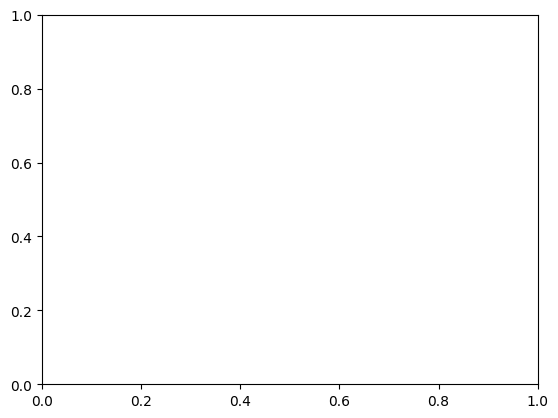

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import athena_read

# Define file path and get sorted list of relevant files
files = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_3/*.athdf"
file_names = sorted(glob.glob(files))

# Filter only relevant files
file_names = [f for f in file_names if "out2" in f]

# Set up figure and axis
fig, ax = plt.subplots()
cbar = None

def process_file(file):
    """Reads density data from an Athena++ HDF5 file and returns a projected density image."""
    rho = athena_read.athdf(file)["rho"]
    #return np.sum(rho, axis=2)  # Project along the third axis
    return np.exp(np.mean(np.log(rho + 1e-6), axis=2))

# Read and process all data files
rho_projections = [process_file(file) for file in tqdm(file_names, desc="Processing files")]

# Normalize color scale for consistent visualization
vmin, vmax = np.min(rho_projections), np.max(rho_projections)

# Prepare animation frames
images = []
for i, rho_proj in enumerate(rho_projections):
    img = ax.imshow(rho_proj, cmap="viridis", animated=True, origin="lower", vmin=vmin, vmax=vmax)
    images.append([img])
    plt.savefig(f"/u/ageorge/athena_fork_turb_box/Snapshots/M0.5_0.01/{i}.png")

# Add title and colorbar
#ax.set_title("Density Projection for r_cl = 0.00010627 and Mach number = 0.5")
if cbar is None:
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("Projected Density")

# Create animation
ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('M0.5_0.001.gif', fps=7, dpi=150)

plt.show()


In [48]:

M = 0.75
cs = cs_calc(40000000, 0.6)
v_turb = M*cs
chi = 1000
amb_rho   = np.array([0.01])
print("vturb:",v_turb)


alpha = np.logspace(-3, 2, 6)

t_cool_mix   = tcool_calc(amb_rho*np.sqrt(chi_cold),np.sqrt(T_floor*T_hot),Z, Lambda_fac=Lambda_fac) #Changing amb rho to make it lower
#alpha = np.array([100])

def tcc_calc(M, chi = 1000, r_cl = 0.025):
    return np.sqrt(chi) * r_cl / (M*cs)

def r_cl_calc(alpha_array):
    return t_cool_mix * M * cs /(np.sqrt(chi) * alpha_array)

def dedt_calc(Ls):
    return 0.5 * Ls**2 * amb_rho * v_turb**3

def t_eddy_calc(Ls):
    return Ls/v_turb



r_cls = r_cl_calc(alpha)
Ls = r_cls*40
x = Ls/2
dedt = dedt_calc(Ls)
t_eddy = t_eddy_calc(Ls)
dtdrive = t_eddy/100
tlimit = t_eddy * 10


print("cs:",cs)
print(f't_cool_mix: {t_cool_mix}') 
# for i in range(len(alpha)):
print(alpha, r_cls, Ls, x, dedt, t_eddy, dtdrive, tlimit)


vturb: 0.4656976162122717
cs: 0.6209301549496956
t_cool_mix: [0.21648962]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [3.18816722e+00 3.18816722e-01 3.18816722e-02 3.18816722e-03
 3.18816722e-04 3.18816722e-05] [1.27526689e+02 1.27526689e+01 1.27526689e+00 1.27526689e-01
 1.27526689e-02 1.27526689e-03] [6.37633444e+01 6.37633444e+00 6.37633444e-01 6.37633444e-02
 6.37633444e-03 6.37633444e-04] [8.21266705e+00 8.21266705e-02 8.21266705e-04 8.21266705e-06
 8.21266705e-08 8.21266705e-10] [2.73840115e+02 2.73840115e+01 2.73840115e+00 2.73840115e-01
 2.73840115e-02 2.73840115e-03] [2.73840115e+00 2.73840115e-01 2.73840115e-02 2.73840115e-03
 2.73840115e-04 2.73840115e-05] [2.73840115e+03 2.73840115e+02 2.73840115e+01 2.73840115e+00
 2.73840115e-01 2.73840115e-02]


In [49]:
data = np.column_stack((alpha, r_cls, Ls, x, dedt, t_eddy, dtdrive, tlimit))
headers = "alpha,r_cl,L,x,dedt,t_eddy,dtdrive,tlimit"
np.savetxt("M0.75_simulation_data.csv", data, delimiter=",", header=headers, comments="", fmt=["%.3f","%.8f","%.9f","%.10f","%.15f","%.15f","%.15f","%.15f"])  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


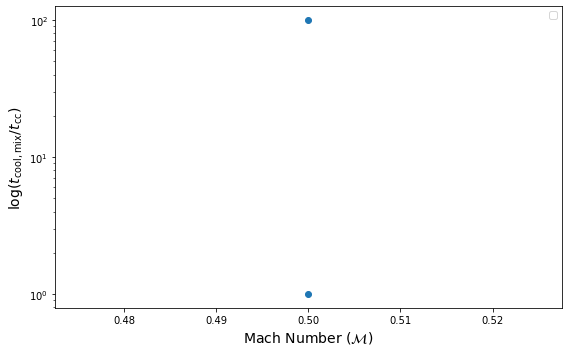

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(np.ones((2))*M, alpha)
plt.xlabel(r"Mach Number ($\mathcal{M}$)", fontsize=14)
plt.ylabel(r"$\log(t_{\rm cool,mix} / t_{\rm cc})$", fontsize=14)

plt.yscale('log')
plt.tight_layout()

plt.legend()
plt.show()

In [12]:
chi_cold = 1000

# Chemical composition
Xsol = 1.0;
Zsol = 1.0;

X = Xsol * 0.7381;
Z = Zsol * 0.0134;
Y = 1 - X - Z;

# Relevant temperature
T_floor      = 40000             # floor temperature in the simulation
T_ceil       = 1000000000         # ceiling temperature in the simulation
T_hot_req    = 40000000           # hot medium temperature required, reset to this on restart, if cloud_flag is 1
T_hot        = 10000000            # initial hot medium temperature (box heats up due to turbulence) increased by a order
T_cold       = 80000             # cold medium temperature, used in cold gas mass calculation
T_cut_mul    = 0.5               # T_cut = T_hot_req * T_cut_mul, gas higher than T_cut is not cooled
T_cut        = 20000000.0         # gas higher than T_cut is not cooled

amb_rho   = np.array([1e-3]) #### Isn't amb_rho 1? 1.6e-4
# Lambda_fac = np.array([1e4,5000,1000.0,500.0,100.0, 50.0, 10.0, 5.0, 1.0, 0.5, 0.1]) 
Lambda_fac = np.array([1.0]) 


t_cool_mix   = tcool_calc(amb_rho*np.sqrt(chi_cold),np.sqrt(T_floor*T_hot),Z, Lambda_fac=Lambda_fac)
print(t_cool_mix)

# Ms = np.array([0.25, 0.5, 0.75])
# r_cls = np.array([0.25, 0.025, 0.0025])
# t_ccs_25 = np.array([tcc_calc(r_cls[0], 1000, i) for i in Ms])
# t_ccs_025 = np.array([tcc_calc(r_cls[1], 1000, i) for i in Ms])
# t_ccs_0025 = np.array([tcc_calc(r_cls[2], 1000, i) for i in Ms])

# for i in r_cls:
#     for j in Ms:
#         t_cc = tcc_calc(j, 1000, i)
#         t_ccs = np.append(t_ccs, t_cc)

#print(t_ccs)

#alpha = t_cool_mix / t_ccs

#print(t_ccs_25)

[2.1648962]


In [13]:
print(t_ccs_25)

NameError: name 't_ccs_25' is not defined

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(Ms, t_cool_mix/t_ccs_25, label = "r_cl = 0.25")
plt.scatter(Ms, t_cool_mix/t_ccs_025, label = "r_cl = 0.025")
plt.scatter(Ms, t_cool_mix/t_ccs_0025, label = "r_cl = 0.0025")
plt.xlabel(r"Mach Number ($\mathcal{M}$)", fontsize=14)
plt.ylabel(r"$\log(t_{\rm cool,mix} / t_{\rm cc})$", fontsize=14)

#plt.yscale('log')
plt.tight_layout()

plt.legend()
plt.show()

NameError: name 'Ms' is not defined

<Figure size 800x500 with 0 Axes>

In [10]:
import sys

sys.path.insert(1, 'utils')

import units as un
import power_law_fit_max as pm

def Lam_fn(T, Zsol=1.0, Lambda_fac=1.0):
    Lam_file = np.loadtxt("utils/CT_WSS09.dat")

    T_min = np.min(Lam_file[:, 0])
    T_max = np.max(Lam_file[:, 0])

    N = np.shape(Lam_file)[0]

    if T < T_min or T > T_max:
        return 0.0

    else:
        i_a = 0
        i_b = N - 1

        while i_a != i_b - 1:
            mid = int((i_a + i_b) / 2)

            if T > Lam_file[mid, 0]:
                i_a = mid
            else:
                i_b = mid

        T_a = Lam_file[i_a, 0]
        T_b = Lam_file[i_b, 0]

        LamH_a = Lam_file[i_a, 1]
        LamH_b = Lam_file[i_b, 1]

        LamZ_a = Lam_file[i_a, 2]
        LamZ_b = Lam_file[i_b, 2]

        dT = T_b - T_a

        LamH = LamH_a * (T_b - T) / dT + LamH_b * (T - T_a) / dT
        LamZ = LamZ_a * (T_b - T) / dT + LamZ_b * (T - T_a) / dT

    return (LamH + LamZ * Zsol) * Lambda_fac

def Lam_fn_powerlaw(T, Zsol=1.0, Lambda_fac=1.0):
    T_min = np.min(pm.cool_t)
    T_max = np.max(pm.cool_t)

    N = len(pm.cool_t)

    if T < T_min or T > T_max:
        return 0.0

    else:
        i_a = 0
        i_b = N - 1

        while i_a != i_b - 1:
            mid = int((i_a + i_b) / 2)

            if T > pm.cool_t[mid]:
                i_a = mid
            else:
                i_b = mid

        T_a = pm.cool_t[i_a]
        T_b = pm.cool_t[i_b]

        Lam = (pm.cool_coef[i_a] * 1e-23) * (T / pm.cool_t[i_a]) ** pm.cool_index[i_a]

        return Lam * Lambda_fac


def tcool_calc(rho, T, Zsol=1.0, Lambda_fac=1.0, fit_type="max"):
    n_H = rho * un.unit_density / (un.muH * un.CONST_amu)

    fit_dict = {}
    fit_dict["max"] = Lam_fn_powerlaw
    # fit_dict['5pnt_pwlf'] = Lam_fn_powerlaw_pwlf_fit
    fit_dict["continuous"] = Lam_fn

    lam_arr = fit_dict[fit_type](T=T, Zsol=Zsol, Lambda_fac=Lambda_fac)
    # print(f"{lam_arr=}")

    p = rho * T / (un.KELVIN * un.mu)  # in code units
    # print(f"{p= }")

    q = n_H * n_H * lam_arr / un.unit_q  # in code units

    if q == 0:
        return math.nan
    # print(f"{un.muH= }")

    tc = p / (q * (un.g - 1))  # in code units
    # print(f"{tc= }")

    return tc
    # in code units

cs = cs_calc(10000000, 0.6)

def tcc_calc(M, chi = 1000, r_cl = 0.025):
    return np.sqrt(chi) * r_cl / (M*cs)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys


CONST_pc = 3.086e18
CONST_yr = 3.154e7
CONST_amu = 1.66053886e-24
CONST_kB = 1.3806505e-16

unit_length = CONST_pc * 1e3  # 1 kpc
unit_time = CONST_yr * 1e6  # 1 Myr
unit_density = CONST_amu  # 1 mp/cm-3
unit_velocity = unit_length / unit_time

def cs_calc(T_hot, mu=0.5):
    # cs_ini = 0.06725645065307617

    # cs_new = cs_ini*np.sqrt(T_hot/1e7)

    M = 1e-3
    R = 8.31446261815324

    # mu = 0.5

    kB = 1.38 * 1e-23
    mp = 1.66 * 1e-27

    m_to_cm = 100

    # return np.sqrt(g.g*R*T_hot/M) * m_to_cm/g.unit_velocity
    return np.sqrt(0.666 * kB / (mu * mp) * T_hot) * m_to_cm / unit_velocity

In [9]:

data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_1/Cloud/Turb.hst", comments="#")
#data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_11/0.00559328/1/Cloud/Turb.hst", comments="#")
# data_5_99    = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_5.99/Cloud/Turb.hst", comments="#")
# data_359     = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.hst", comments="#")


# data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/Turb.hst", comments="#")
# #data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_11/0.00559328/1/Cloud/Turb.hst", comments="#")
# data_5_99    = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.1/Cloud/Turb.hst", comments="#")
# data_359     = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha0.1/Cloud/Turb.hst", comments="#")

tcc_8 = tcc_calc(0.5 )
alpha_8 = t_cool_mix/tcc_8
print(alpha_8)

data_0_0425     = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_8/1/Turb.hst", comments="#")



cold_mass_10 = data_10[:,13]
cold_mass_10 =cold_mass_10[cold_mass_10 !=0 ]
time_10 = data_10[:len(cold_mass_10), 0]

# cold_mass_5_99 = data_5_99[:,13]
# cold_mass_5_99 =cold_mass_5_99[cold_mass_5_99 !=0 ]
# time_5_99 = data_5_99[:len(cold_mass_5_99), 0]

# cold_mass_359 = data_359[:,13]
# cold_mass_359 =cold_mass_359[cold_mass_359 !=0 ]
# time_359 = data_359[:len(cold_mass_359), 0]

# cold_mass_0_0425 = data_0_0425[:,13]
# cold_mass_0_0425=cold_mass_0_0425[cold_mass_0_0425 !=0 ]
# time_0_0425 = data_0_0425[:len(cold_mass_0_0425), 0]

plt.figure(figsize=(8, 5))
plt.plot(time_10, cold_mass_10/cold_mass_10[0], label = "M = 0.5")
# plt.plot(time_5_99, cold_mass_5_99/cold_mass_5_99[0], label = "M = 0.75" )
# plt.plot(time_359, cold_mass_359/cold_mass_359[0], label = "M = 0.25" )
#plt.plot(time_0_0425, cold_mass_0_0425/cold_mass_0_0425[0], label = "alpha = 0.0425" )

plt.xlabel("Time")
plt.ylabel("m/m(t=0)")
plt.legend()


plt.grid()
plt.show()
plt.close()


NameError: name 'tcc_calc' is not defined

In [17]:
!python --version


Python 3.7.6


In [1]:
import yt
yt.__version__

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

data_read.py()::get_array_athena(): Returning fields: ('rho',)


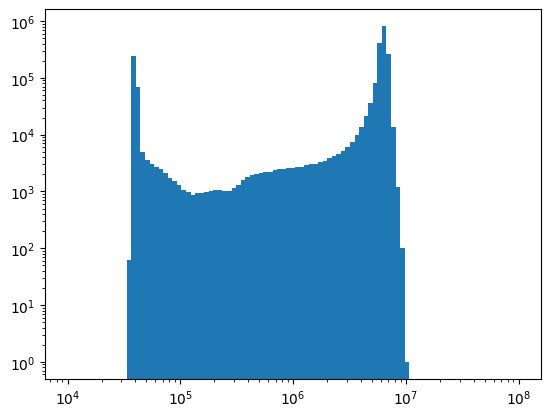

In [18]:
import own_package.athena.data_read as re

#val = re.get_array_athena('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00002.athdf')
val = re.get_array_athena('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_8/1/Turb.out2.00050.athdf')

T = val['T']

plt.hist(T.flatten(), bins = np.logspace(4,8, 100))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [85]:
np.concatenate([mass_ratios_15, mass_ratios_16, mass_ratios_14, mass_ratios_17])

array([ 1.16454069, -2.63124826, -2.31389695, -2.01643384, -1.41974054,
        1.18532007,  1.15565799, -2.61707392, -2.0678753 , -1.4939881 ,
        1.2946672 , -1.85352386, -0.52555038,  1.10555199,  1.10555199,
        0.27212981,  1.06884761, -2.7000374 , -2.4333001 , -1.82411528,
       -2.22909938, -0.75817422, -1.64506891])

In [79]:
len(mass_ratios_14)

3

In [80]:
len(r_cl_Test_14s)

4

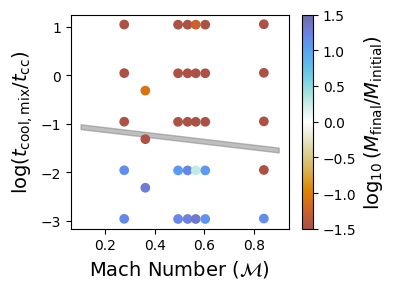

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
import matplotlib.colors as mcolors

cs = 0.6209301549496956
t_cool_mix = 0.21648962
chi = 1000

def get_mass_ratio(path):
    data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass = cold_mass[cold_mass != 0]  
    return np.log10(np.mean(cold_mass[-50:]) / np.mean(cold_mass[0:10]))


hst_Test_15_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.01/Turb/Turb.hst"
hst_Test_14_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Turb/Turb.hst"
hst_Test_16_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.01/Turb/Turb.hst"
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"

data_Test_15 = np.loadtxt(hst_Test_15_path, comments="#")
mass_Test_15 = data_Test_15[:, 2]
KE_Test_15 = data_Test_15[:, 6] + data_Test_15[:, 7] + data_Test_15[:, 8]
vturb_Test_15_array = np.sqrt(2 * KE_Test_15 / mass_Test_15)
vturb_Test_15 = np.mean(vturb_Test_15_array[-500:])
Mach_Test_15 = vturb_Test_15 / cs
r_cl_Test_15s = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.75_simulation_data.csv", delimiter=",", skiprows=1)[:-1,1]
t_cc_Test_15 = np.sqrt(chi) * r_cl_Test_15s / vturb_Test_15

mass_ratios_15 = [ get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.001/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.01/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_10/Cloud/Turb.hst")]

data_Test_14 = np.loadtxt(hst_Test_14_path, comments="#")
mass_Test_14 = data_Test_14[:, 2]
KE_Test_14 = data_Test_14[:, 6] + data_Test_14[:, 7] + data_Test_14[:, 8]
vturb_Test_14_array = np.sqrt(2 * KE_Test_14 / mass_Test_14)
vturb_Test_14 = np.mean(vturb_Test_14_array[-500:])
Mach_Test_14 = vturb_Test_14 / cs
r_cl_Test_14s = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.75_simulation_data.csv", delimiter=",", skiprows=1)[1:-2,1]
t_cc_Test_14 = np.sqrt(chi) * r_cl_Test_14s / vturb_Test_14

mass_ratios_14 = [ get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.01/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_1/Cloud/Turb.hst")]
                   #get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_10/Cloud/Turb.hst")]


data_Test_16 = np.loadtxt(hst_Test_16_path, comments="#")
mass_Test_16 = data_Test_16[:, 2]
KE_Test_16 = data_Test_16[:, 6] + data_Test_16[:, 7] + data_Test_16[:, 8]
vturb_Test_16_array = np.sqrt(2 * KE_Test_16 / mass_Test_16)
vturb_Test_16 = np.mean(vturb_Test_16_array[-500:])
Mach_Test_16 = vturb_Test_16 / cs
r_cl_Test_16s = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.25_simulation_data.csv", delimiter=",", skiprows=1)[:-1,1]
t_cc_Test_16 = np.sqrt(chi) * r_cl_Test_16s / vturb_Test_16

mass_ratios_16 = [ get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.001/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.01/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_10/Cloud/Turb.hst")]


data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")
mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-500:])
Mach_Test_17 = vturb_Test_17 / cs
r_cl_Test_17s_temp = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[:-1,1]  #Problem because there are 2 sims with the same r_cl values
r_cl_Test_17s = []
for i in r_cl_Test_17s_temp:
    r_cl_Test_17s.append(i)
    r_cl_Test_17s.append(i)
    r_cl_Test_17s.append(i)
    r_cl_Test_17s.append(i)
r_cl_Test_17s = np.array(r_cl_Test_17s)  

#Defining a different Mach number to get some offset
Mach_number_17 = []
for i in range(len(r_cl_Test_17s_temp)):
    Mach_number_17.append(vturb_Test_17/cs*0.90)
    Mach_number_17.append(vturb_Test_17/cs*0.97)
    Mach_number_17.append(vturb_Test_17/cs*1.03)
    Mach_number_17.append(vturb_Test_17/cs*1.10)

t_cc_Test_17 = np.sqrt(chi) * r_cl_Test_17s / vturb_Test_17

mass_ratios_17 = [      get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_4/Turb.hst"),
                        get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_3/Turb.hst"),
                        get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_2/Turb.hst"),    
                        get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud/Turb.hst"),    
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst')     ]
            



all_mass_ratios = mass_ratios_14 + mass_ratios_15 + mass_ratios_16 + mass_ratios_17
vmin, vmax = np.min(all_mass_ratios), np.max(all_mass_ratios)

plt.figure(figsize=(4, 3))
divnorm = mcolors.TwoSlopeNorm(vmin=-1.5, vcenter=0, vmax=1.5)

x_vals = np.linspace(0.1, 0.9, 1000)  
y_vals = -0.6 * x_vals - 1  

plt.fill_between(x_vals, y_vals - 0.05, y_vals + 0.05, color='gray', alpha=0.5)

sc = plt.scatter(
    (np.concatenate([
        np.ones(len(r_cl_Test_15s)) * Mach_Test_15,
        np.ones(len(r_cl_Test_16s)) * Mach_Test_16,
        np.ones(len(r_cl_Test_14s)) * Mach_Test_14,
        Mach_number_17
    ])),
    np.log10(np.concatenate([t_cool_mix / t_cc_Test_15, t_cool_mix / t_cc_Test_16, t_cool_mix / t_cc_Test_14, t_cool_mix / t_cc_Test_17])),
    c=np.concatenate([mass_ratios_15, mass_ratios_16, mass_ratios_14, mass_ratios_17]),
    cmap=cmr.prinsenvlag,  # Using a diverging colormap
    norm=divnorm,  # Ensure zero is white
)

cbar = plt.colorbar(sc)
cbar.set_label(r"$\log_{10}(M_{\rm final} / M_{\rm initial}$)", fontsize=14)

plt.xlabel(r"Mach Number ($\mathcal{M}$)", fontsize=14)
plt.ylabel(r"$\log(t_{\rm cool,mix} / t_{\rm cc})$", fontsize=14)
#plt.yscale('log')

plt.tight_layout()
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.png")
plt.show()


In [11]:
np.ones(len(r_cl_Test_15s)) * Mach_Test_15

array([0.84020631, 0.84020631, 0.84020631, 0.84020631])

In [5]:
print(np.ones(len(r_cl_Test_17s)) * Mach_Test_17)

print(t_cool_mix / t_cc_Test_17)

[0.5486461 0.5486461 0.5486461 0.5486461 0.5486461 0.5486461 0.5486461
 0.5486461]
[1.09729221e-02 1.09729221e-02 1.09729210e-01 1.09729210e-01
 1.09729468e+00 1.09729468e+00 1.09731533e+01 1.09731533e+01]


In [28]:
def input_read(fn):
    # Function to read the input file and parse
    data = {}
    with open(fn, "r") as fp:
        lines = fp.readlines()
        for line in lines:
            if ("=" in line) and (line[0] != "#"):
                # print(line)
                key, value = line.split("#")[0].split("=")[:2]
                data[key.strip()] = value.strip()

    return data

In [29]:
paths = ['/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/athinput_init.turb',
         '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.01/Cloud/athinput_init.turb',
         '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_1/Cloud/athinput_init.turb' ]

data_0_01 = input_read(paths[1])
data_0_1 = input_read(paths[0])
data_1 = input_read(paths[2])

r_cl = [data_0_01["cloud_radius"],
        data_0_1["cloud_radius"],
        data_1["cloud_radius"]
       ]

print(r_cl)


['0.1062722', '0.01062722', '0.001062722']


In [30]:
#Finding t_corrs

paths_15 = ['/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.01/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.1/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_1/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_10/Cloud/athinput_init.turb',          
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.01/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_1/Cloud/athinput_init.turb',
           ]
t_corrs_15 = []

for i in paths_15:
    data = input_read(i)
    t_corr = data["tcorr"]
    t_corrs_15.append(float(t_corr))


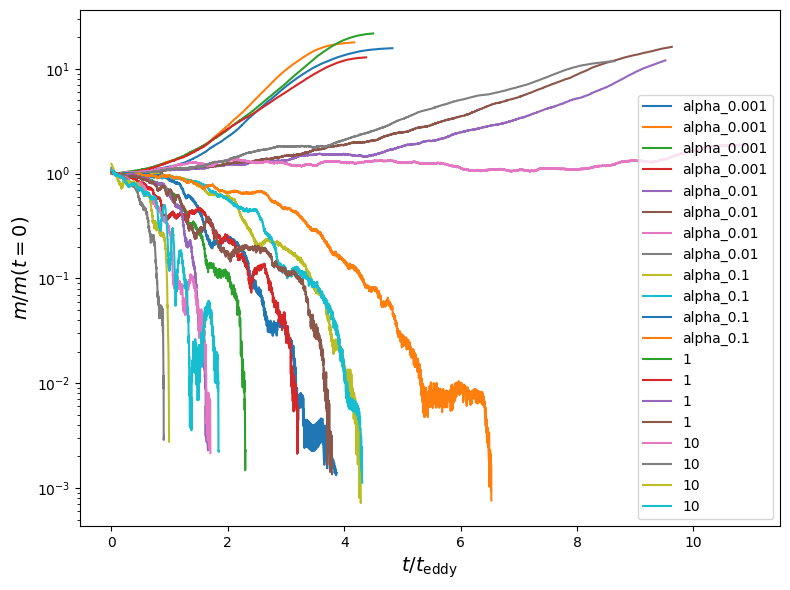

In [11]:
import numpy as np
import matplotlib.pyplot as plt


#### NEEDS TO BE RECALCULATED FROM BOX INSTEAD
# t_corrs_17 = [27.3,27.3, 2.73,2.73, 0.273,0.273, 0.0273,0.0273]

## CALCULATE v_turb from turb box
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")
mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-200:])

Ls_temp = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[:-1,2]
Ls = []
for i in Ls_temp:
    Ls.append(i)
    Ls.append(i)
    Ls.append(i)
    Ls.append(i)
    
#Ls = [ 8.501779258,8.501779258 , 0.850177926,0.850177926, 0.0850177926,0.0850177926,  0.00850177926,0.00850177926 ]

paths =[                "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_4/Turb.hst",
                        "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_3/Turb.hst",
                        "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_2/Turb.hst",   
                        "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud/Turb.hst",   
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst'    ]


def mass_change(path):
    data = data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass =cold_mass[cold_mass !=0 ]

    time = data[:len(cold_mass), 0]
    return (cold_mass / np.mean(cold_mass[0:128])), time
    
plt.figure(figsize=(8, 6))
for i in range(len(paths)):
    cold_mass, time = mass_change(paths[i])
    t_eddy = Ls[i] / vturb_Test_17
    plt.plot(time/t_eddy, cold_mass, label = paths[i].split("/")[6])

    
plt.yscale('log')
plt.xlabel(r"$t / t_{\rm eddy}$", fontsize=14)
plt.ylabel(r"$m / m(t=0)$", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


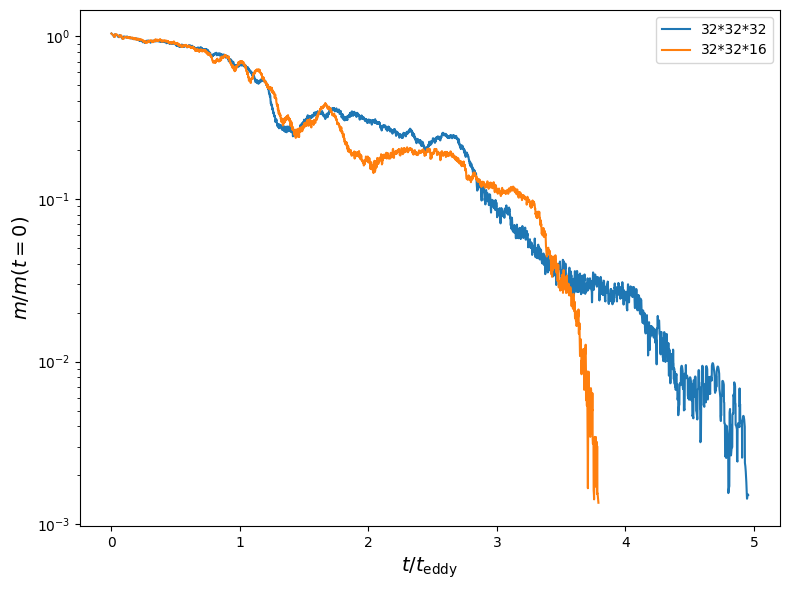

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load turbulence data and calculate v_turb
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")

mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-500:])

# Define scales and file paths
Ls = [8.501779258, 8.501779258, 0.850177926, 0.850177926, 0.0850177926, 0.0850177926, 0.00850177926, 0.00850177926]
paths = [
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst"
]
import numpy as np
import matplotlib.pyplot as plt


#### NEEDS TO BE RECALCULATED FROM BOX INSTEAD
# t_corrs_17 = [27.3,27.3, 2.73,2.73, 0.273,0.273, 0.0273,0.0273]

## CALCULATE v_turb from turb box
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")
mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-200:])

Ls_temp = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[:-1,2]
Ls = [Ls_temp[3],Ls_temp[3]]

    
#Ls = [ 8.501779258,8.501779258 , 0.850177926,0.850177926, 0.0850177926,0.0850177926,  0.00850177926,0.00850177926 ]

paths =[                
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_1/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst' ]




def mass_change(path):
    data = data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass =cold_mass[cold_mass !=0 ]

    time = data[:len(cold_mass), 0]
    return (cold_mass / np.mean(cold_mass[0:128])), time
    
plt.figure(figsize=(8,6))
label = ["32*32*32", "32*32*16"]
for i in range(len(paths)):
    cold_mass, time = mass_change(paths[i])
    t_eddy = Ls[i] / vturb_Test_17
    plt.plot(time/t_eddy, cold_mass, label = label[i])

    
plt.yscale('log')
plt.xlabel(r"$t / t_{\rm eddy}$", fontsize=14)
plt.ylabel(r"$m / m(t=0)$", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

